In [1]:
#load dataset from tensorflow
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print('Data size (train): ' + str(x_train.shape))
print('Data size (test): ' + str(x_test.shape))
print('Data label size (train): ' + str(y_train.shape))
print('Data label size (test): ' + str(y_test.shape))
__, height, width = x_train.shape
dim = height * width

Data size (train): (60000, 28, 28)
Data size (test): (10000, 28, 28)
Data label size (train): (60000,)
Data label size (test): (10000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_train=x_train.reshape(60000,-1)
x_test=x_test.reshape(10000,-1)

#extracting training data with labels 0,1 + turn label 0 to -1
Xtrain=[]
ytrain=[]
Xtest=[]
ytest=[]
for i in range(len(x_train)):
    if y_train[i]==0:
        ytrain=np.concatenate((ytrain,[-1]),axis=0)#turn 0 labels to -1
        Xtrain=np.concatenate((Xtrain,x_train[i,:]),axis=0)#extracting data
        
    elif y_train[i]==1:
        ytrain=np.concatenate((ytrain,[1]),axis=0)
        Xtrain=np.concatenate((Xtrain,x_train[i,:]),axis=0)
        
#extracting test data with labels 0,1 + turn label 0 to -1
for i in range(len(x_test)):
    if y_test[i]==0:
        ytest=np.concatenate((ytest,[-1]),axis=0)
        Xtest=np.concatenate((Xtest,x_test[i,:]),axis=0)
        
    elif y_test[i]==1:
        ytest=np.concatenate((ytest,[1]),axis=0)
        Xtest=np.concatenate((Xtest,x_test[i,:]),axis=0)

In [5]:
#append 1's for use of bias
Xtrain=Xtrain.reshape(-1,784)
Xtest=Xtest.reshape(-1,784)
Xtrain=np.concatenate((Xtrain,np.ones((len(Xtrain),1))),axis=1)
Xtest=np.concatenate((Xtest,np.ones((len(Xtest),1))),axis=1)

In [6]:
#initialize weight
w= np.random.randn(785,1)

In [7]:
def train_perceptron(X, y, w, learning_rate = 1e-3):
 # X: data matrix
 # y: class labels of images in X
 # w: model parameters

 # nb_changes: the number of parameter changes/updates.
 # equivalent to the number of misclassified images.
    nb_changes = 0
    
 # -------- Fill in here -----------
    for i in range(X.shape[0]):
        if (y[i]*np.dot(X[i,:],w) <= 0):
            #w=w+y[i]*X[i,:]
            w=w+y[i]*learning_rate*X[i,:].reshape(-1,1)           
            nb_changes=nb_changes+1
 # ---------------------------------

    return w, nb_changes

In [8]:
epochs=0
while True:
    #train_perceptron until np_changes==0 or epoch == 100
    w,nb_changes=train_perceptron(Xtrain,ytrain,w)
    train_e = nb_changes/len(Xtrain)*100
    
    
    #test_perceptron
    e_num=0
    for i in range(len(Xtest)):
        if (ytest[i]*np.dot(Xtest[i,:],w)<=0):
            e_num=e_num+1        
    test_e=e_num/len(Xtest)*100
    
    #print results
    print('epochs' ,epochs ,' nb_changes',nb_changes,'training error',train_e,'test error',test_e)
    
    #break
    if nb_changes==0 or epochs==100:
        break
    epochs = epochs+1

epochs 0  nb_changes 49 training error 0.38689301223845246 test error 0.14184397163120568
epochs 1  nb_changes 26 training error 0.20529016975917883 test error 0.09456264775413711
epochs 2  nb_changes 18 training error 0.1421239636794315 test error 0.09456264775413711
epochs 3  nb_changes 19 training error 0.15001973943939992 test error 0.09456264775413711
epochs 4  nb_changes 12 training error 0.09474930911962101 test error 0.04728132387706856
epochs 5  nb_changes 8 training error 0.06316620607974734 test error 0.14184397163120568
epochs 6  nb_changes 11 training error 0.08685353335965258 test error 0.09456264775413711
epochs 7  nb_changes 3 training error 0.023687327279905253 test error 0.09456264775413711
epochs 8  nb_changes 9 training error 0.07106198183971575 test error 0.18912529550827423
epochs 9  nb_changes 5 training error 0.03947887879984208 test error 0.09456264775413711
epochs 10  nb_changes 12 training error 0.09474930911962101 test error 0.14184397163120568
epochs 11  nb

In [45]:
#show test_error images
img_error=[]
img_label=[]
img_num=0
for i in range(len(Xtest)):
    if (ytest[i]*np.dot(Xtest[i,:],w)<=0):
        img_error=np.concatenate((img_error,Xtest[i,:]),axis=0)
        img_label=np.concatenate((img_label,ytest),axis=0)
        img_num=img_num+1

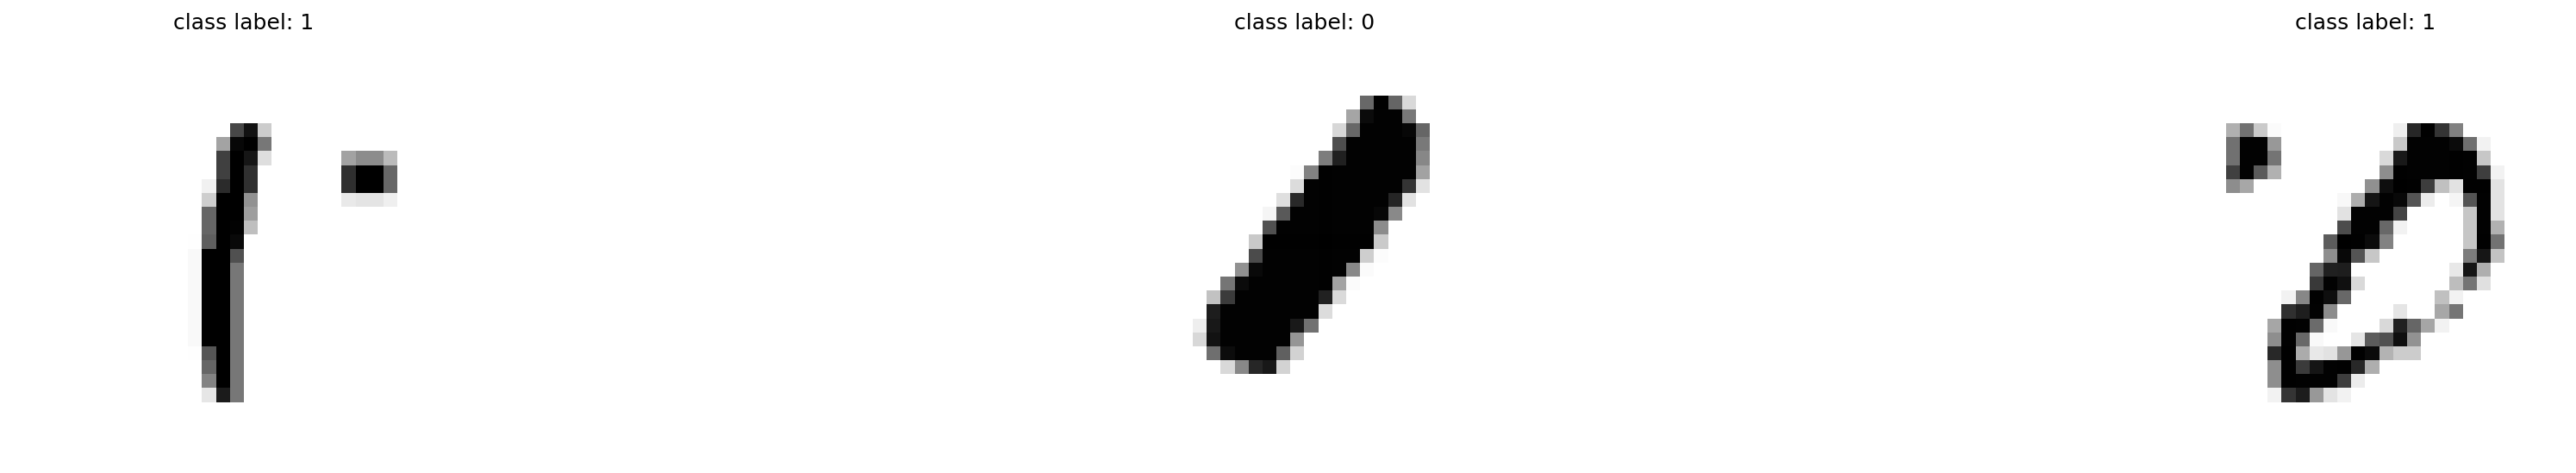

In [46]:
img_error=img_error.reshape(-1,785)
img_error=img_error[:,0:784]
#show image
fig, axes = plt.subplots(nrows=1,ncols=img_num, figsize=(30,4), dpi=150)
for i in range(img_num):
    img=img_error[i,:].reshape(28,28)
    axes[i].imshow(img.reshape(28,28),cmap='gray_r')
    axes[i].axis('off')
    if img_label[i]==-1:
        axes[i].set_title('class label: 0')
    else:
        axes[i].set_title('class label: 1')
plt.show()